# Penguins Dataset Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
df = sns.load_dataset("penguins")
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

#Sobre os Dados

O dataset Penguins é um conjunto de dados utilizado para análises de machine learning e estatísticas, fornecendo informações sobre três espécies de pinguins (Adelie, Chinstrap e Gentoo) coletadas nas ilhas Palmer, Biscoe e Dream, na Antártida. Este dataset é frequentemente utilizado como uma alternativa ao famoso dataset Iris para estudos de classificação.

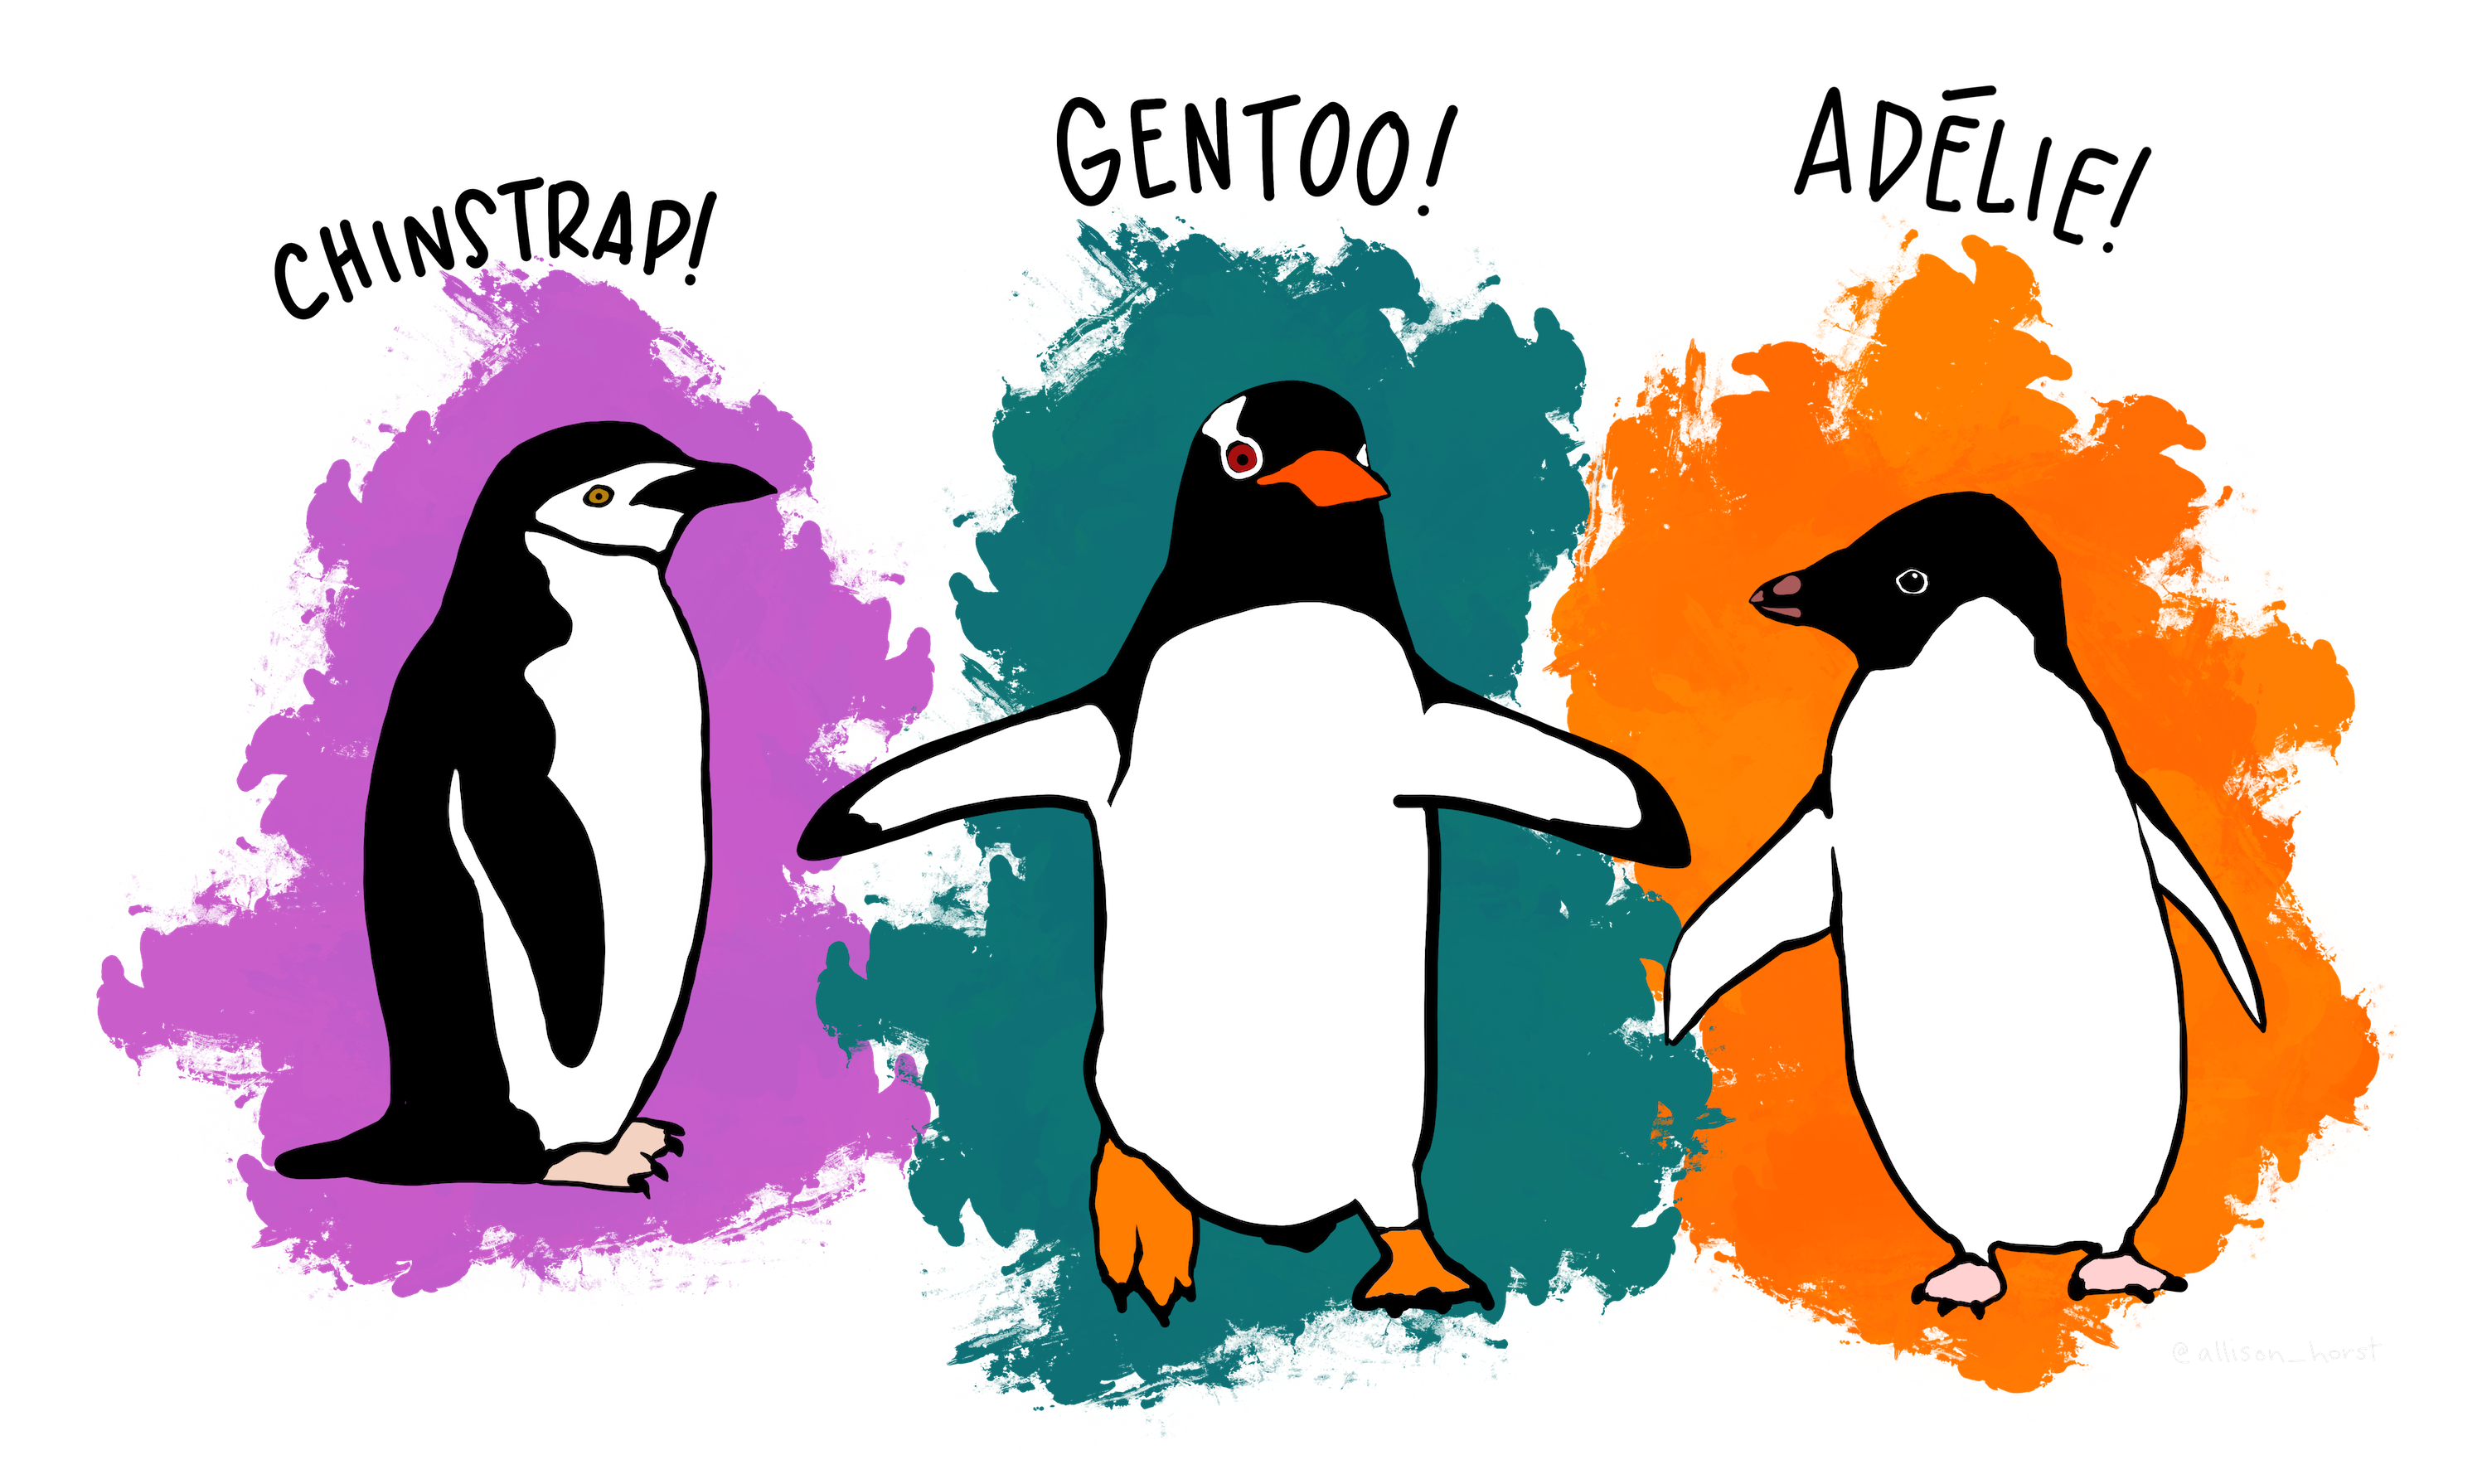

#Estrutura do Dataset

O dataset Penguins contém as seguintes colunas:

- species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)
- island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)
- bill_length_mm: Comprimento do bico em milímetros
- bill_depth_mm: Profundidade do bico em milímetros
- flipper_length_mm: Comprimento da nadadeira em milímetros
- body_mass_g: Massa corporal em gramas
- sex: Sexo do pinguim (Masculino, Feminino)
- year: Ano da observação

#Observações sobre as três espécies

##Espécies de Pinguins

### Adelie:

- Menor das três espécies.
- Habita todas as ilhas do dataset.
- Características: bico pequeno e robusto, nadadeiras curtas.

### Chinstrap:

- Nome devido à linha preta fina sob o queixo.
- Principalmente encontrada na Ilha Dream.
- Características: bico mais fino, nadadeiras médias.

### Gentoo:

- Maior das três espécies.
- Principalmente encontrada na Ilha Biscoe.
- Características: bico mais longo e grosso, nadadeiras longas.

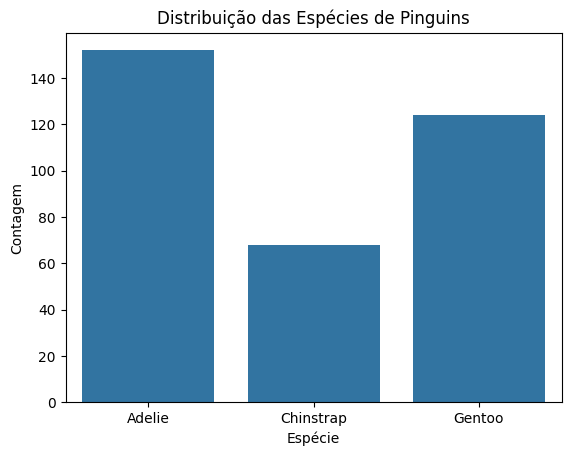

In [ ]:
# Gráfico de barras das espécies de pinguins
sns.countplot(data=df, x='species')
plt.title('Distribuição das Espécies de Pinguins')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.show()

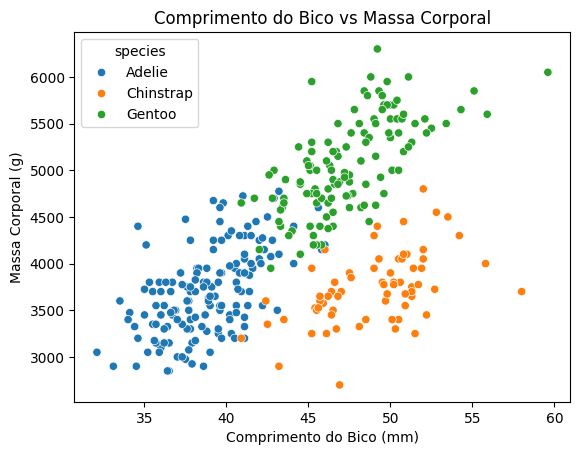

In [ ]:
#Relação entre Comprimento do Bico e Massa Corporal
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Comprimento do Bico vs Massa Corporal')
plt.xlabel('Comprimento do Bico (mm)')
plt.ylabel('Massa Corporal (g)')
plt.show()

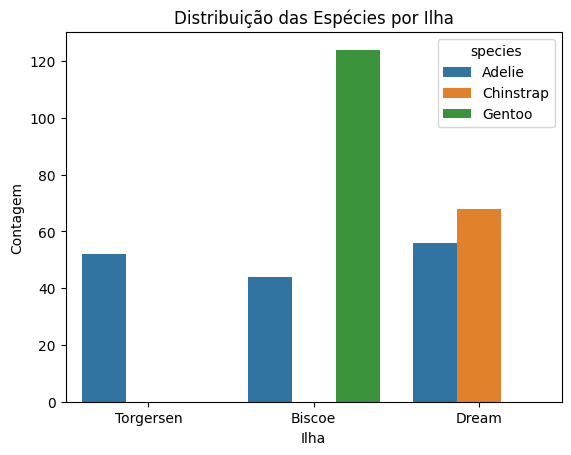

In [ ]:
#Distribuição das Espécies por Ilha
sns.countplot(data=df, x='island', hue='species')
plt.title('Distribuição das Espécies por Ilha')
plt.xlabel('Ilha')
plt.ylabel('Contagem')
plt.show()

## Introdução e Carregamento dos Dados

Neste segmento, realizamos a importação das bibliotecas essenciais para a manipulação, visualização e modelagem dos dados. Também carregamos o conjunto de dados dos pinguins, que servirá como base para todas as nossas análises e modelos subsequentes.

## Exploração dos Dados

Iniciamos com uma exploração básica para entender a estrutura e as características do conjunto de dados, utilizando métodos que exibem as primeiras linhas, informações de tipo de dados e estatísticas descritivas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


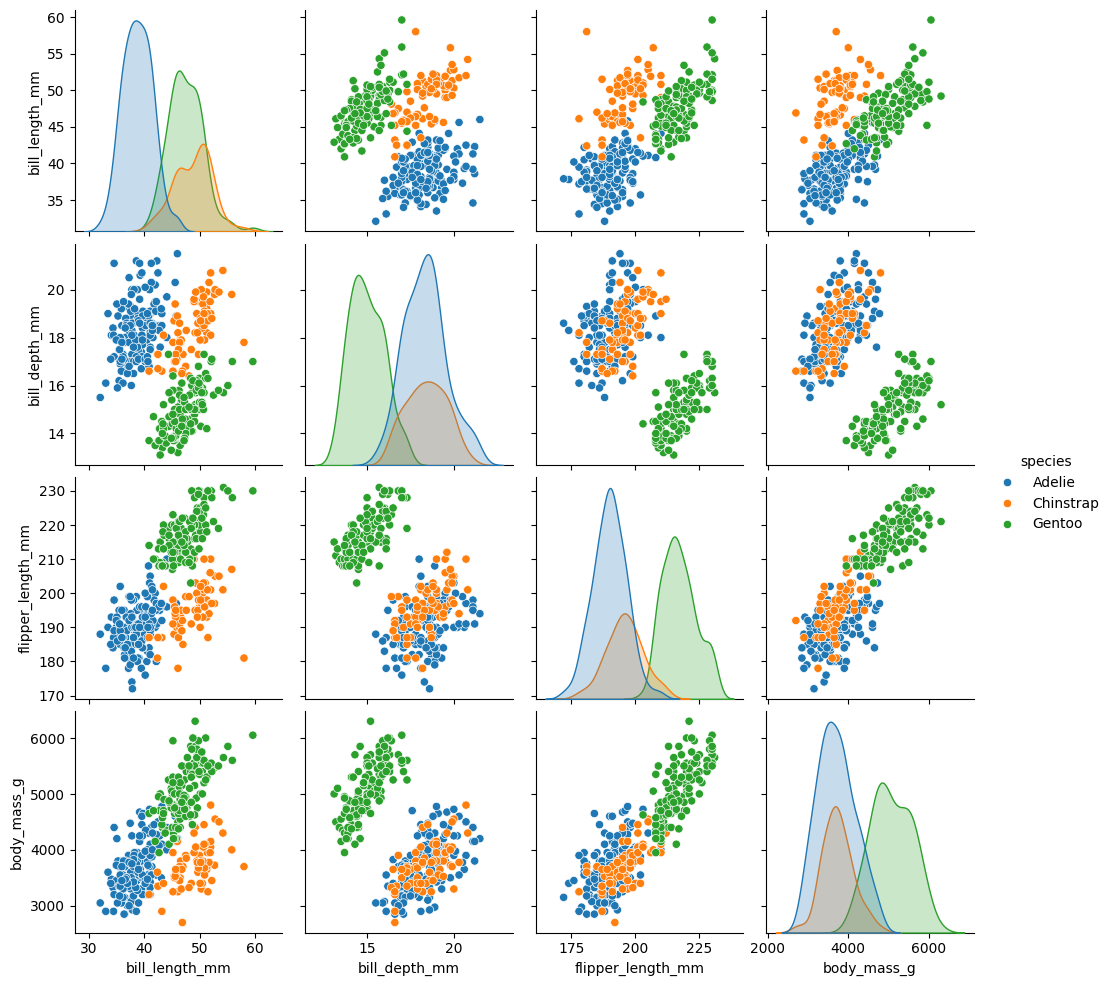

In [ ]:
df.info()
df.describe()
# Gera gráficos de pares para todas as variáveis numéricas no dataset, coloridos por species
sns.pairplot(df, hue='species')

## Pré-processamento dos Dados

Lidamos com valores ausentes e transformamos variáveis categóricas em formatos numéricos através do one-hot encoding, preparando os dados para análises e modelagem mais efetivas.

In [ ]:
# Limpar valores vazios
df.dropna(inplace=True)

# Transformar variáveis categóricas em variáveis numéricas usando one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'island'], drop_first=True)

# Definir características (X) e variável alvo (y)
X = df.drop('species', axis=1)
y = df['species']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos de Regressão

O código treina e avalia um modelo de regressão linear para prever valores numéricos. Primeiro, transforma a variável alvo de texto para números, pois o modelo trabalha melhor com dados numéricos. Depois, divide os dados em treinamento (80%) e teste (20%). Em seguida, cria e treina o modelo com os dados de treinamento, faz previsões e avalia o desempenho usando o Erro Quadrático Médio (MSE), que indica a precisão das previsões.

In [ ]:
# Codificar a variável alvo para formatos numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Utilizar a regressão linear para modelar e fazer previsões
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

# Avaliar o desempenho do modelo de regressão linear usando o erro quadrático médio
print('Train MSE:', np.mean((pred_train - y_train)**2))
print('Test MSE:', np.mean((pred_test - y_test)**2))

Train MSE: 0.05916032138686076
Test MSE: 0.05917319199309038


## Modelos de Classificação
Modelos de classificação são técnicas de machine learning usadas para prever categorias ou classes com base em dados de entrada. Diferente dos modelos de regressão que prevêem valores contínuos, os modelos de classificação atribuem um rótulo a cada conjunto de dados. Exemplos comuns incluem classificação de e-mails como spam ou não, diagnóstico médico (doente ou saudável), e reconhecimento de imagem (gato, cachorro, etc.). Esses modelos aprendem a partir de dados rotulados e fazem previsões sobre novas observações.
No código criamos e treinamos um modelo de regressão logística, faz previsões com ele e avalia seu desempenho usando métricas de precisão, relatório de classificação e matriz de confusão.

In [ ]:
# Utilizar a regressão logística para classificação
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Avaliar a precisão do modelo de regressão logística
pred = log_reg.predict(X_test)
print('Precisão:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Precisão: 0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Predição e avaliação
pred = clf_tree.predict(X_test)
print('Precisão:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Precisão: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [ ]:
# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

# Predição e avaliação
pred = clf_rf.predict(X_test)
print('Precisão:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Precisão: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [ ]:
# Gradient Boosting
clf_gb = GradientBoostingClassifier(n_estimators=100)
clf_gb.fit(X_train, y_train)

# Predição e avaliação
pred = clf_gb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


## Avaliação de Modelos

In [ ]:
# Cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print('Logistic Regression CV Scores:', cv_scores)
print('Logistic Regression CV Mean Score:', np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Scores: [0.97014925 0.98507463 1.         1.         0.98484848]
Logistic Regression CV Mean Score: 0.9880144730891001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Modelos de Ensemble

In [ ]:
# Ensemble using Voting
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', clf_rf), ('gb', clf_gb)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predição e avaliação
pred = voting_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


## Aprendizado Não Supervisionado

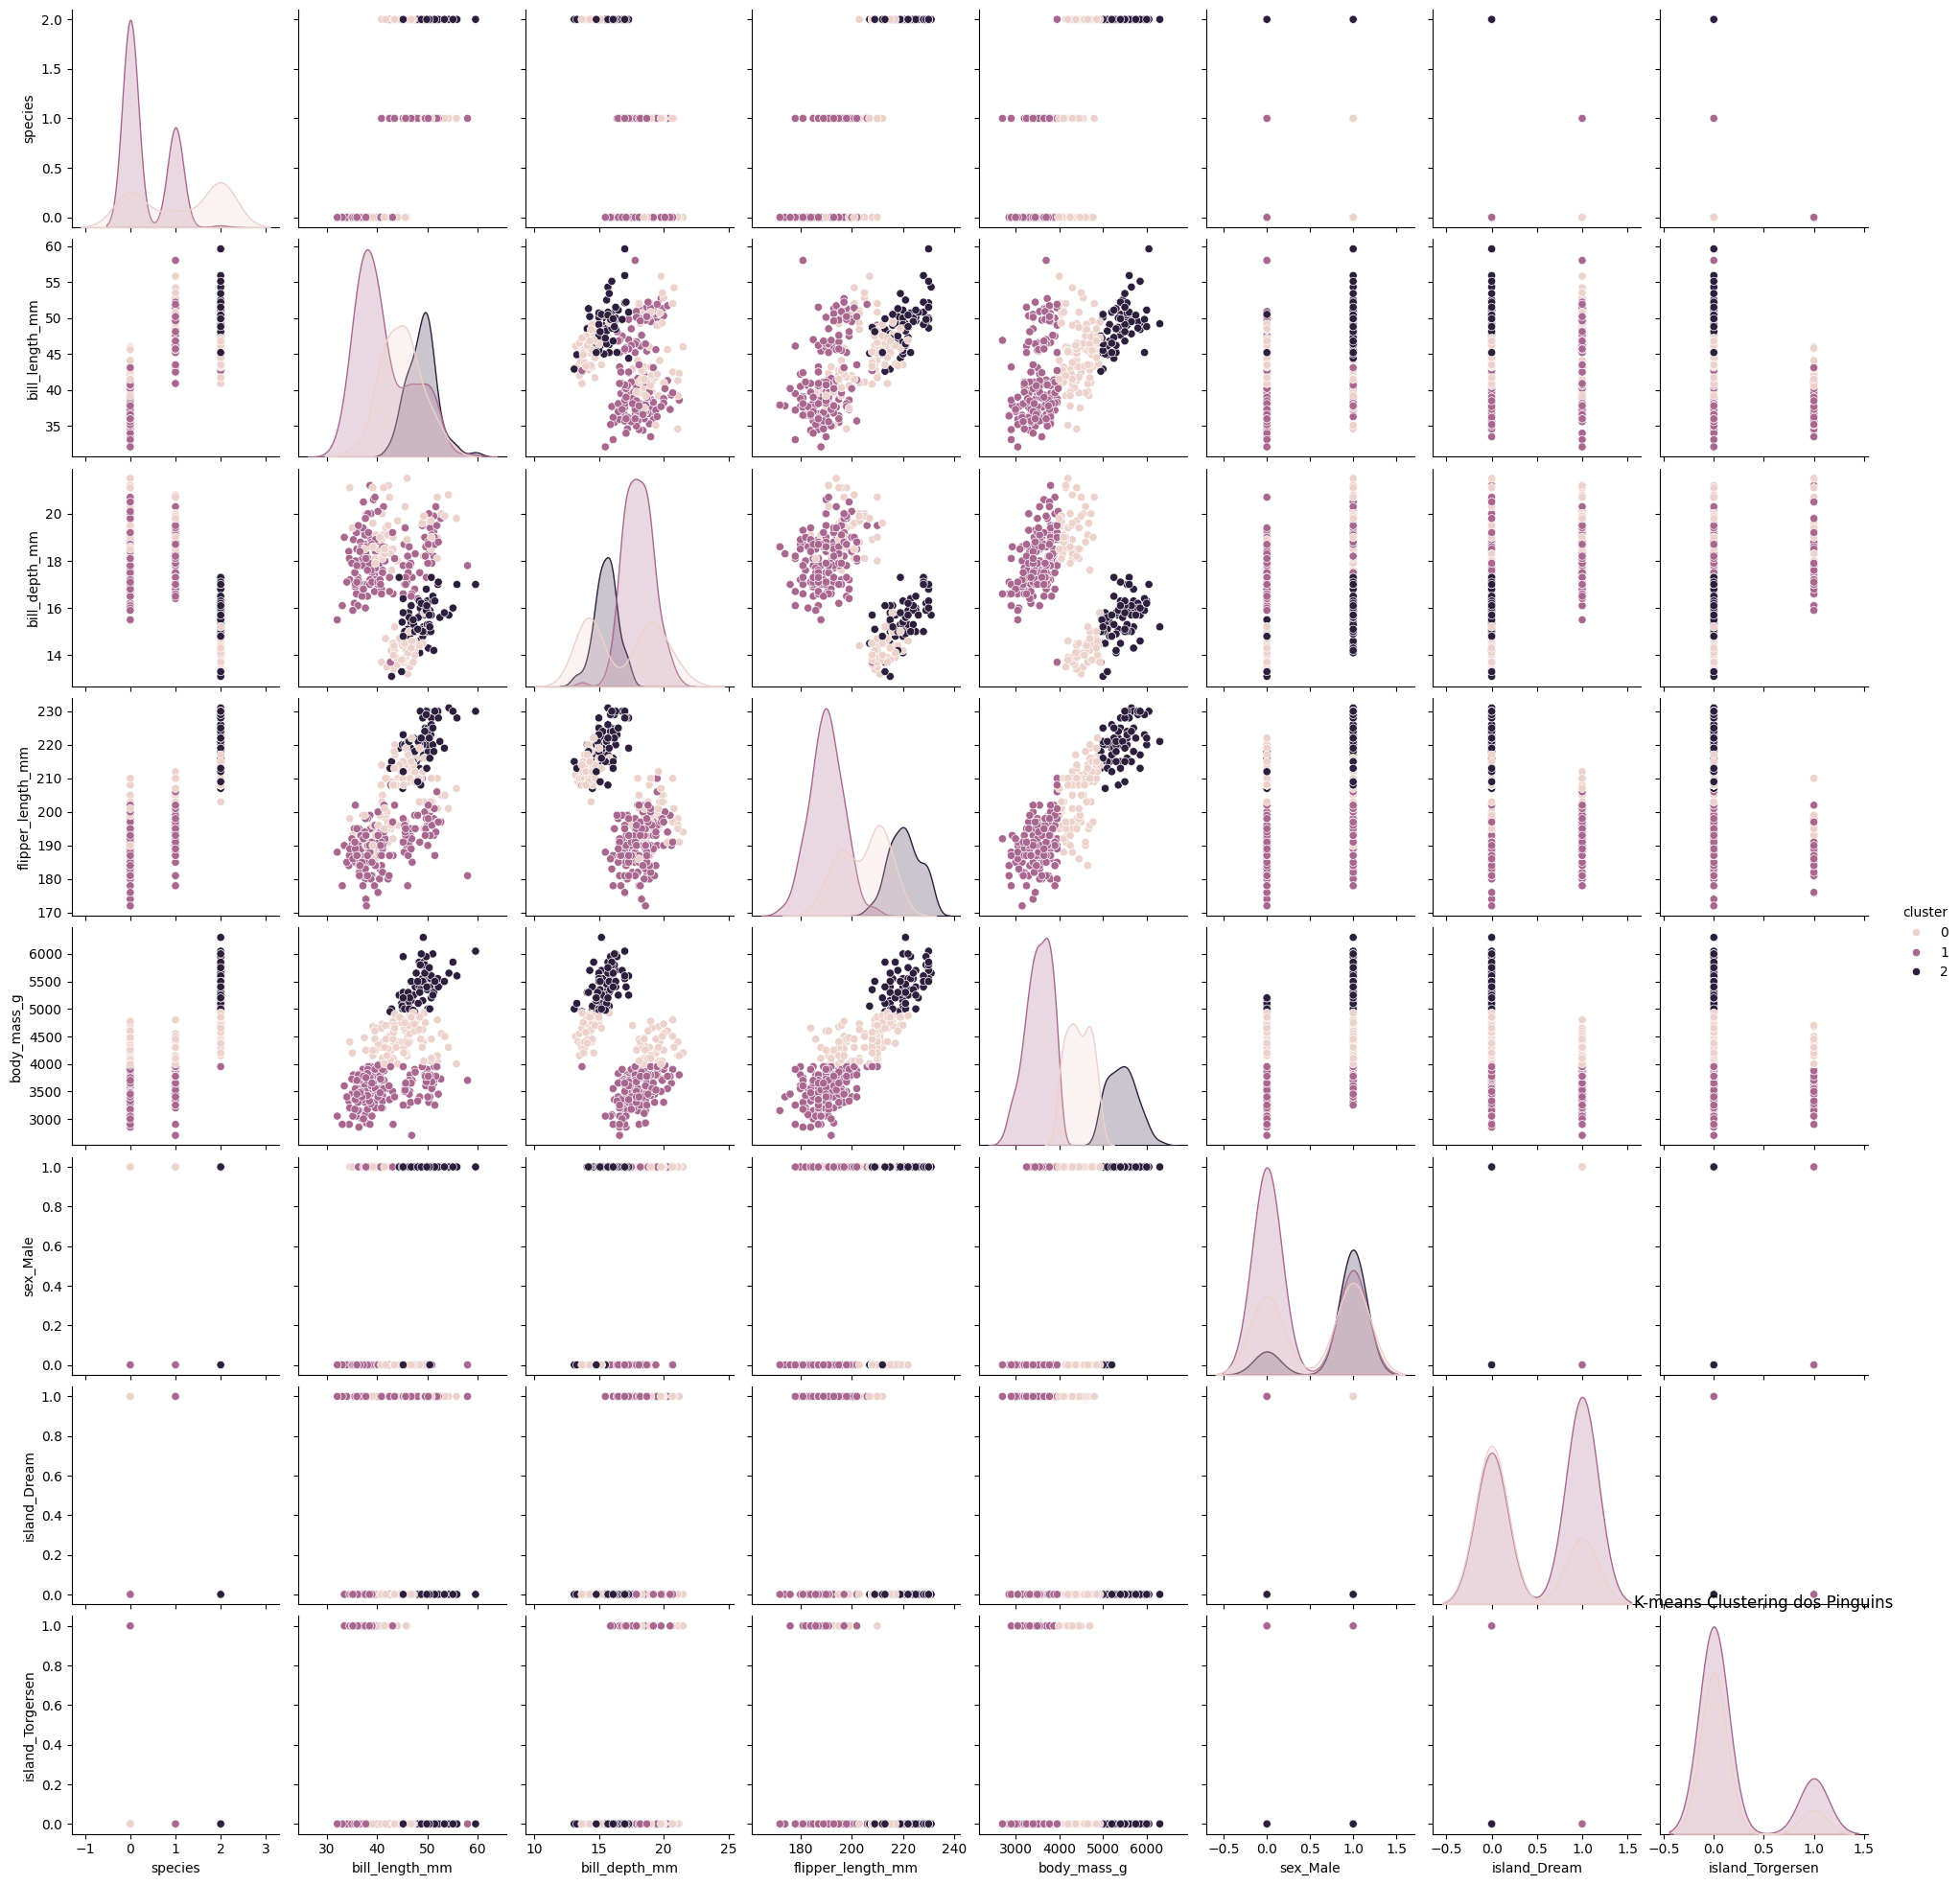

In [ ]:
# Remover linhas com valores ausentes
df_clean = df.dropna()

# Codificar variáveis categóricas
df_clean_encoded = df_clean.copy()
label_encoders = {}
for column in df_clean_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_clean_encoded[column] = label_encoders[column].fit_transform(df_clean_encoded[column])

# Separar as características e a variável de destino novamente
X_clean = df_clean_encoded.drop(columns=['species'])
y_clean = df_clean_encoded['species']

# K-means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_clean)
df_clean_encoded['cluster'] = kmeans.labels_

# Visualização dos clusters
sns.pairplot(df_clean_encoded, hue='cluster')
plt.title("K-means Clustering dos Pinguins")
plt.show()

## Redes Neurais Lineares

In [ ]:
# Remover linhas com valores ausentes
df_clean = df.dropna()

# Codificar variáveis categóricas
df_clean_encoded = df_clean.copy()
label_encoders = {}
for column in df_clean_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_clean_encoded[column] = label_encoders[column].fit_transform(df_clean_encoded[column])

# Separar as características e a variável de destino novamente
X = df_clean_encoded.drop(columns=['species'])
y = df_clean_encoded['species']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Rede neural
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(3, activation='softmax'))

# Compilar o modelo
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
nn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=10, validation_data=(X_test, y_test_encoded))

Epoch 1/50
27/27 [==============================] - 1s 12ms/step - loss: 1.0498 - accuracy: 0.3835 - val_loss: 0.8900 - val_accuracy: 0.5373
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.7331 - val_loss: 0.6604 - val_accuracy: 0.8209
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.8496 - val_loss: 0.4815 - val_accuracy: 0.9254
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.8947 - val_loss: 0.3509 - val_accuracy: 0.9851
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.9474 - val_loss: 0.2562 - val_accuracy: 0.9851
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.9774 - val_loss: 0.1915 - val_accuracy: 0.9851
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.9850 - val_loss: 0.1457 - val_accuracy: 1.0000
Epoch 8/50
27/27 [=

## Redes Neurais com Camada Oculta

In [ ]:
# Redes Neurais com Camada Oculta
nn_model_hidden = Sequential()
nn_model_hidden.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model_hidden.add(Dense(32, activation='relu'))
nn_model_hidden.add(Dense(3, activation='softmax'))

# Compilar o modelo
nn_model_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
nn_model_hidden.fit(X_train, y_train_encoded, epochs=50, batch_size=10, validation_data=(X_test, y_test_encoded))

Epoch 1/50
27/27 [==============================] - 2s 17ms/step - loss: 0.6257 - accuracy: 0.8271 - val_loss: 0.3616 - val_accuracy: 0.9701
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.9662 - val_loss: 0.1673 - val_accuracy: 0.9851
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9887 - val_loss: 0.0779 - val_accuracy: 1.0000
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9925 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 8/50
27/27 [=

## Conclusão

Neste notebook, abordamos diversos conceitos de aprendizado de máquina aplicados ao conjunto de dados dos pinguins. Avaliamos modelos de regressão e classificação, analisamos a capacidade de generalização dos modelos, implementamos árvores de decisão, técnicas de ensemble, aprendizado não supervisionado e redes neurais.

# Rascunhos


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
df = sns.load_dataset("penguins")
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [ ]:
df = df.dropna() #deleta os nulos

In [ ]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

In [ ]:
px.box(df, x="species", y="body_mass_g")

In [ ]:
px.box(df, x="species", y="body_mass_g", color="sex")

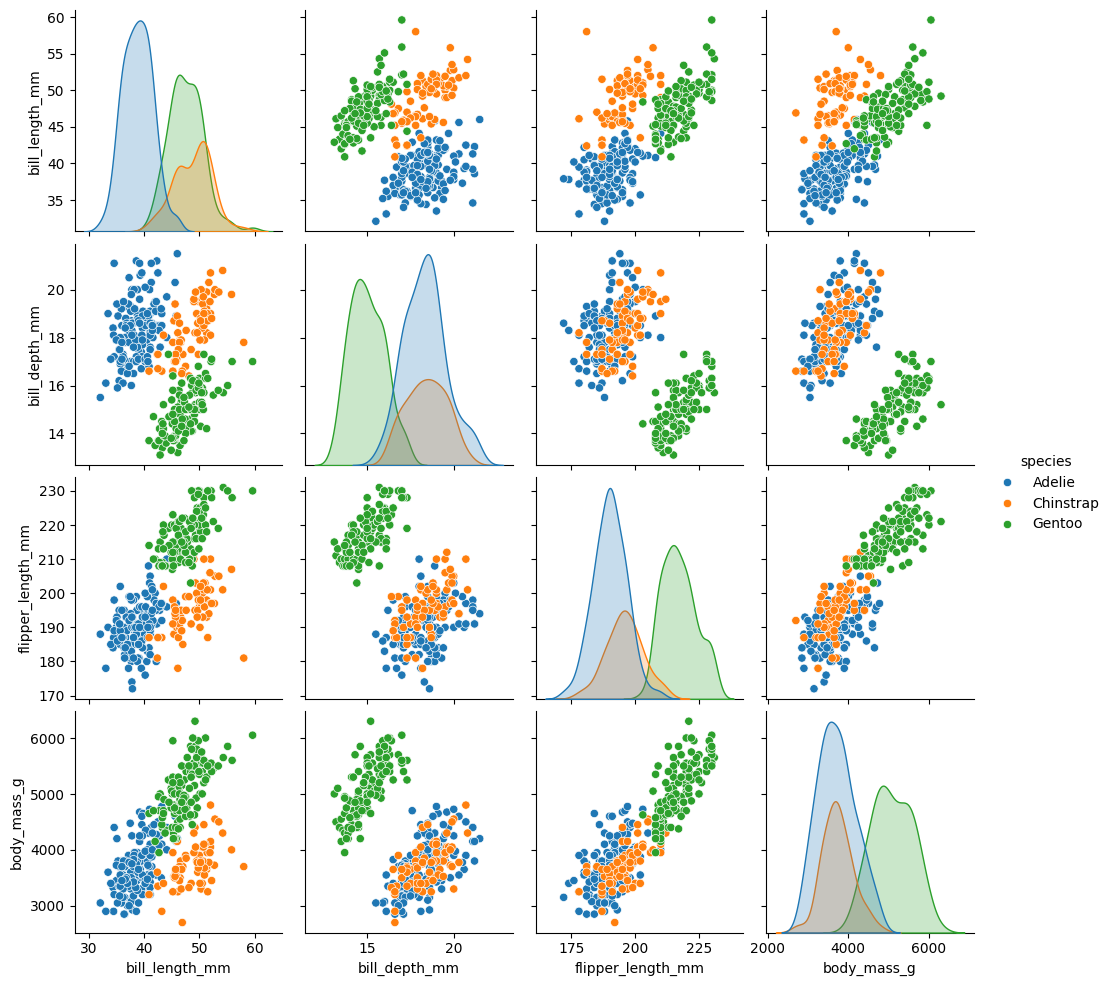

In [ ]:
sns.pairplot(df, hue = "species")

In [ ]:
#converção
labels_to_islands = {"Biscoe": 1, "Dream": 2, "Torgersen": 3}
df['island_labels'] = df['island'].replace(labels_to_islands)

In [ ]:
#bill_length_mn
#body_mass_g
#island
#flipper_length_mn
#separar em treino e teste
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
list_var = ["bill_length_mm", "body_mass_g", "island_labels", "flipper_length_mm"]
#y - treino: target treino: species
# x treino: lista de variaveis
#variaveis - treino
xtrain = train[list_var]
ytrain = train['species']
#variaveis - test
xtest = test[list_var]
ytest = test['species']

In [ ]:
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
pred = model.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, pred)

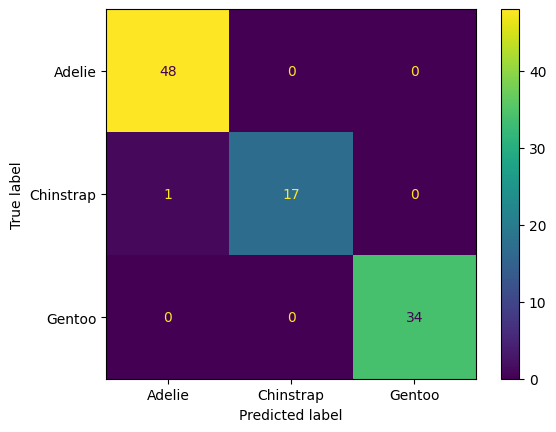

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
accuracy_score(ytest, pred, normalize=False)

99

In [ ]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

